In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import linear_model
import statsmodels.api as sm


In [12]:
df11 = pd.read_csv('/Users/brucehu/Desktop/Midterm-project/dataset/202211.csv')
print(df11)


                                                  name   price  score   dis
0    La Quinta Inn by Wyndham Austin Capitol / Down...   682.0    5.8   0.4
1          Courtyard Austin Downtown/Convention Center   974.0    8.2   0.2
2          DoubleTree by Hilton Austin-University Area   915.0    8.0   1.1
3                                      Fairmont Austin  1072.0    8.9   0.4
4       Staybridge Suites Austin Airport, an IHG Hotel   798.0    7.7   4.5
..                                                 ...     ...    ...   ...
174                         Residence Inn Austin South  1049.0    8.2   4.1
175  Downtown, Convention Center, Capitol, Zilker P...  2375.0    8.3   1.9
176                                Natiivo Austin VIII  1377.0   10.0   0.8
177  Residence Inn by Marriott Austin Parmer/Tech R...   794.0    8.1  10.4
178                          Four Seasons Hotel Austin  3484.0    8.5   0.3

[179 rows x 4 columns]


In [13]:
X = df11[['dis','score']].values.reshape(-1,2)
Y = df11['price']


In [14]:

x = X[:, 0]
y = X[:, 1]
z = Y


x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 10, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [15]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [16]:
r2 = model.score(X, Y)

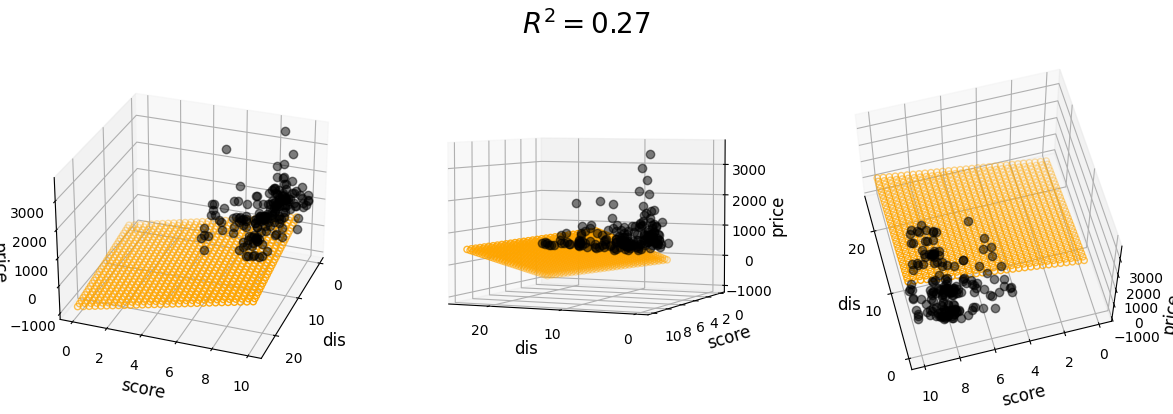

In [17]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), 
               s=20, edgecolor='orange')
    ax.set_xlabel('dis', fontsize=12)
    ax.set_ylabel('score', fontsize=12)
    ax.set_zlabel('price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.text2D(0.2, 0.32, '', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 1, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, '', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=20)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

##### 